# STEP3 TA IndéMode  

>### 環境構築

ターミナルにて  
 ● pip install streamlit  
 ● pip install requests  
 ● pip install pandas  
 ● pip install beautifulsoup4  
 ● pip install geopy  
 ● pip install urllib3 

>### コードまとめ

IndéMode
サロン開業を検討したい方に向けた物件検索・マーケティング分析アプリです。

下のグラフは 美容室の1日の平均来客数です。


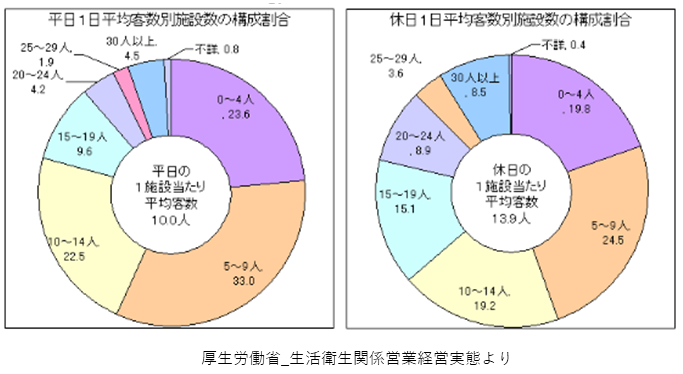


下のグラフは 席数vs店舗面積 の開業実績です。


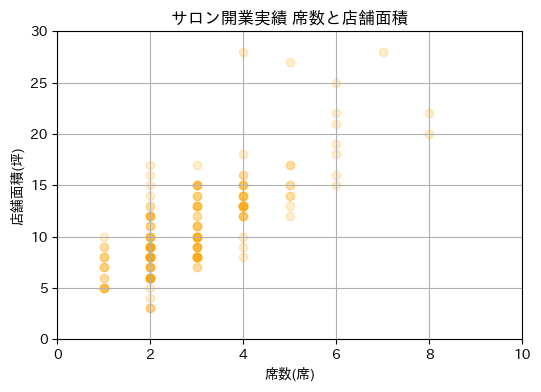


下の写真は内装費用の坪単価10万円、30万円のサロンイメージです。


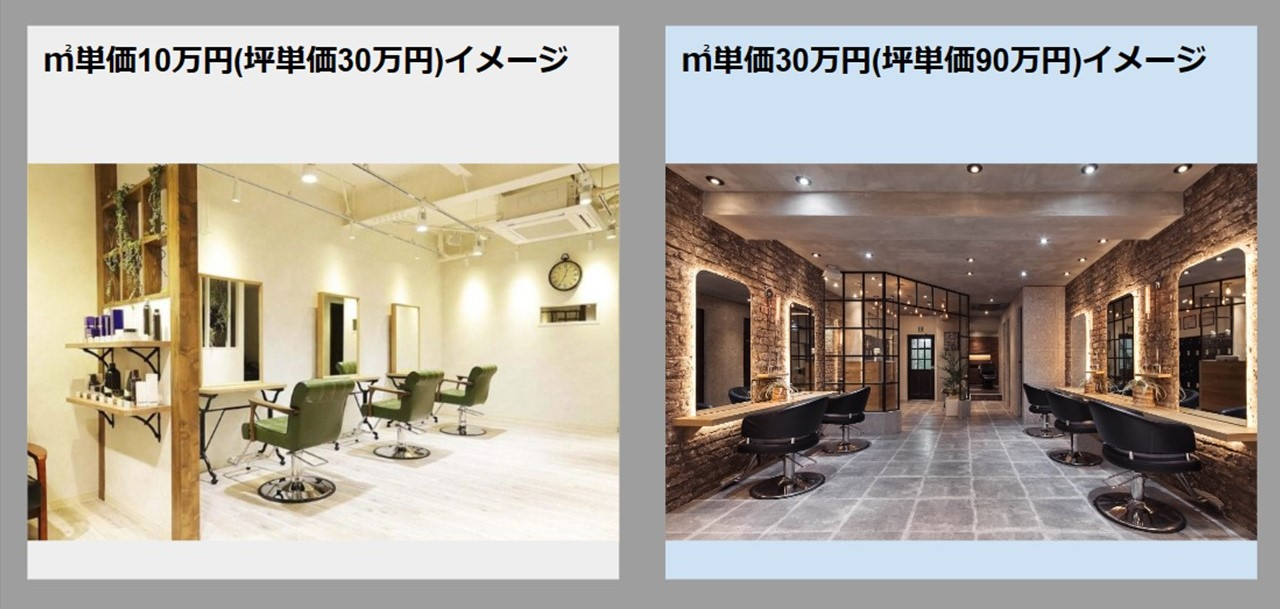


Q1. ご開業されるサロンのカット席数を選択して下さい。
  2席

Q2. ご開業されるサロンの内装費用を選択して下さい。
  10万/坪

Q3. ご開業されるサロンで雇用するスタイリストの人数を選択して下さい。
  1人

Q4. ご開業されるサロンのカット席回転数 ( = 営業時間(h/日) / お客様1人あたりの施術時間(h/人) ) を選択して下さい。
  6回転/日

Q5. ご開業されるサロン想定稼働率を選択して下さい。
  60%

下のグラフは スタイリストの年齢別給与です。


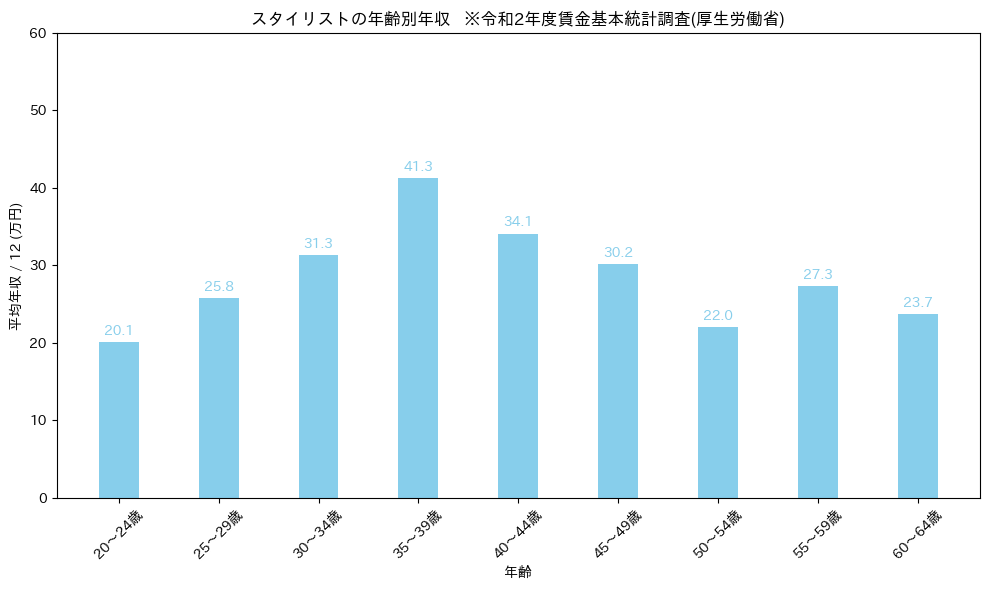


Q6. 雇用されるスタイリストの給与(万円/月)を選択して下さい。※雇用しない場合は「0」を選択して下さい。
  25万円/月

下のグラフは女性客がサロンで使った金額です。


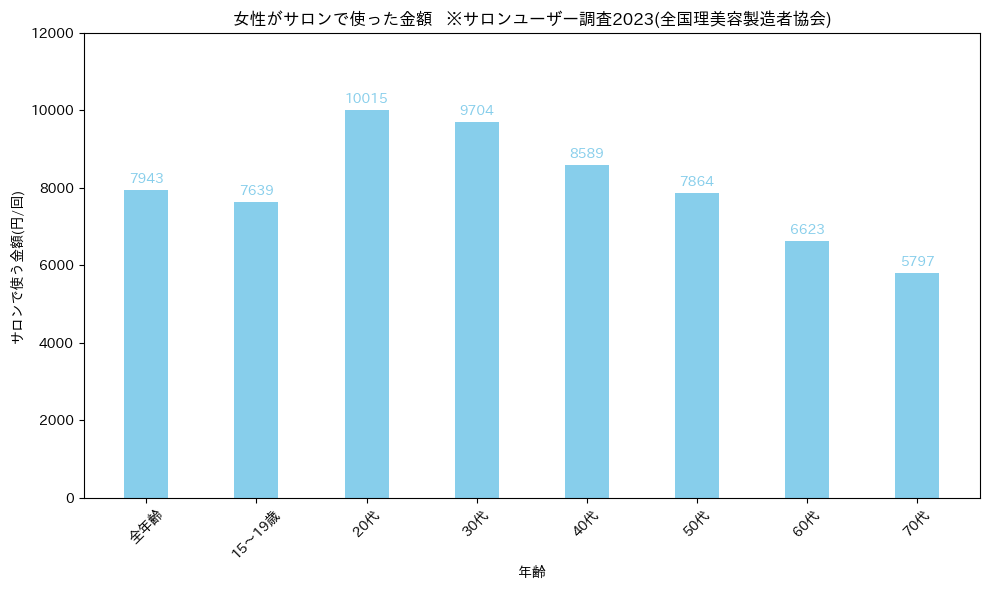

下のグラフは男性客がサロンで使った金額です。


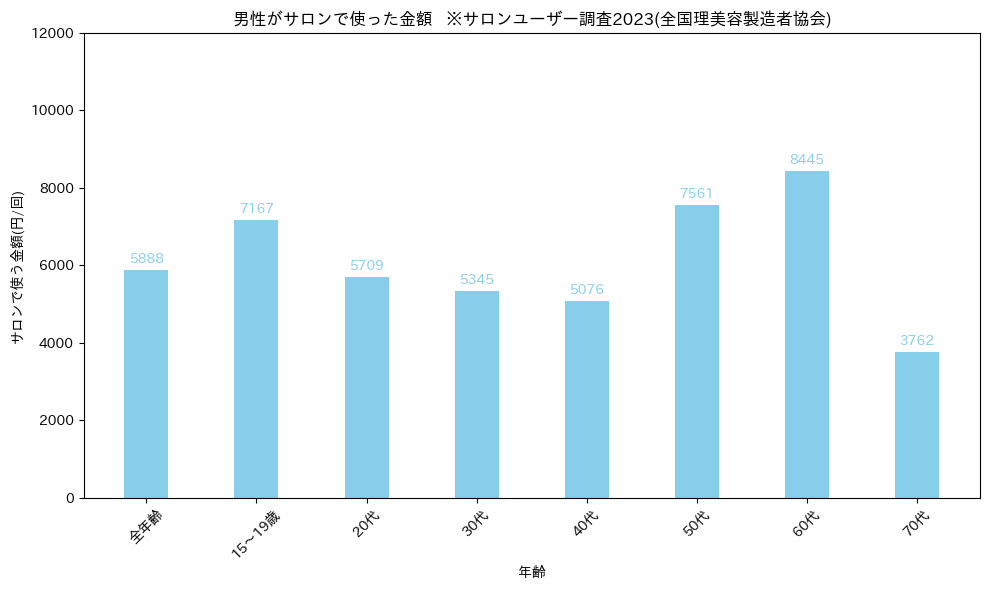

Q7. ご開業されるサロンのお客様の客単価見込み(円)を選択して下さい。
  8000円

下のグラフは 首都圏駅の利用者数ランキングです。


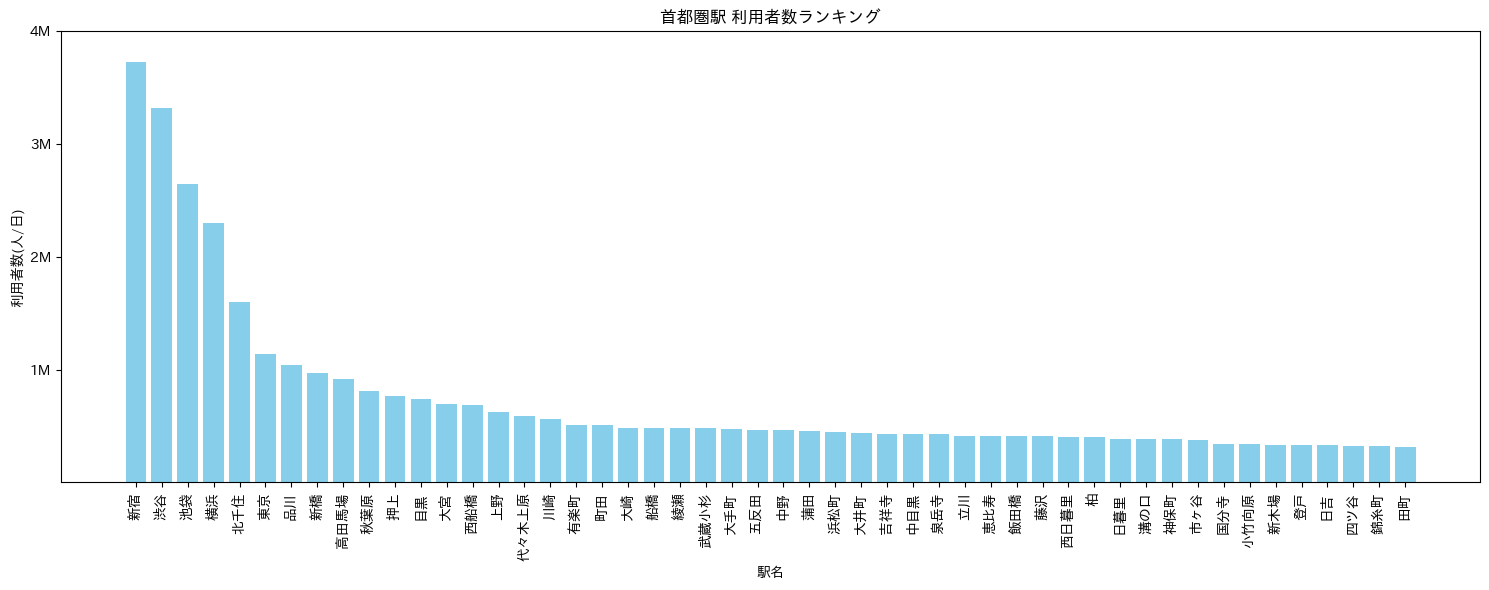

Q8. どの駅の近くで開業されるか選択して下さい。
  有楽町駅

Q9. 最寄駅の路線を選択して下さい。
  JR山手線


ご入力ありがとうございました。
まずは「 JR山手線有楽町駅 」の周辺情報を調査します。

■ 有楽町駅 の情報

■ 有楽町駅所在エリア
 ・エリア: 千代田区
 ・エリア賃料相場: 26956 円/坪
 ・エリア内サロン件数 from 楽天Beauty: 26 件
 ・エリア内カット単価平均額: 4956.0 円


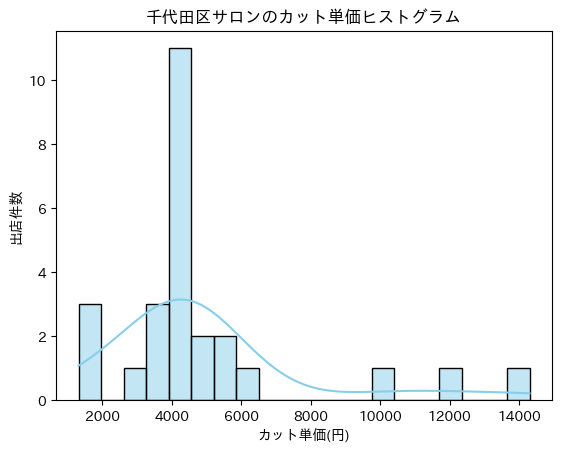

 ・空きテナント検索数: 46 件
 ・開業リスクの低いテナント上位5件  ※開業リスク = (目標利益 - 固定費)/(1-変動費率) ÷ 想定売上
     ※リスク1.0以上の物件は目標利益を見込めない(場合によっては赤字となる)物件です。おススメできませんので開業条件を見直す等ご検討下さい。
     ※無料版では目標利益 = 30万円/月、変動費 = 25% で計算しております。詳細に数値設定されたい場合は有料版のご利用をお願い致します。


,開業リスク,内装費(万円),住所,有楽町駅からの距離(m),最寄駅,賃料(万円),坪単価(万円/坪),面積(坪),築年,階
0,0.92,119.97,千代田区神田佐久間町3,2754.82,JR山手線秋葉原 2,14.40,1.20,12.00,1982年1月(昭和57年1月),階:4F／6F
1,0.94,103.33,千代田区東神田1-3-5,2739.77,JR総武本線 馬喰町駅 3,16.50,1.60,10.33,2022年7月(令和4年7月),階:1F／5F
2,0.94,114.50,千代田区東神田1-3-5,2739.77,JR総武本線 馬喰町駅 3,16.40,1.43,11.45,2022年7月(令和4年7月),階:3F／5F
3,1.06,174.03,千代田区神田練塀町66,2979.21,秋葉原 4,30.00,1.72,17.40,2016年3月(平成28年3月),階:4F／10F
4,1.09,176.78,千代田区外神田2-9-9,3005.37,ＪＲ⼭⼿線「秋葉原」 7,33.00,1.87,17.68,1987年5月(昭和62年5月),階:2F／6F


 ・開業リスクの低いテナント上位5件の所在地
     ※MAP上の丸枠は各テナントの商圏範囲を示しています。
     ※無料版では商圏範囲を半径500mと設定しております。詳細に数値設定されたい場合は有料版のご利用をお願い致します。


■ 開業リスク低いテナント上位5件の商圏分析
   ここからはシミュレーションに含まれない情報です。入力条件の検討にご活用下さい。

・テナント商圏居住者の年間サロン利用額(千万円)


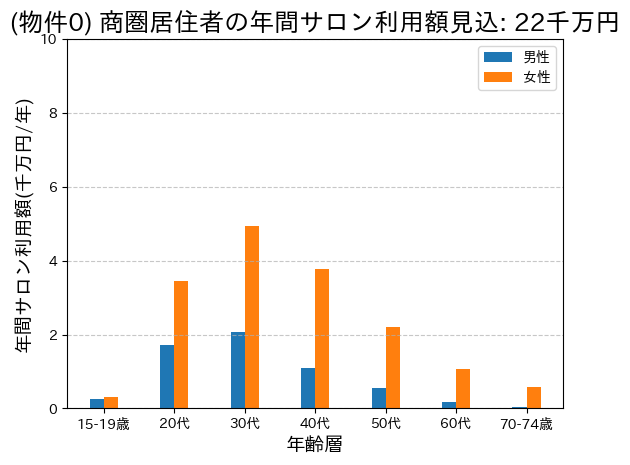

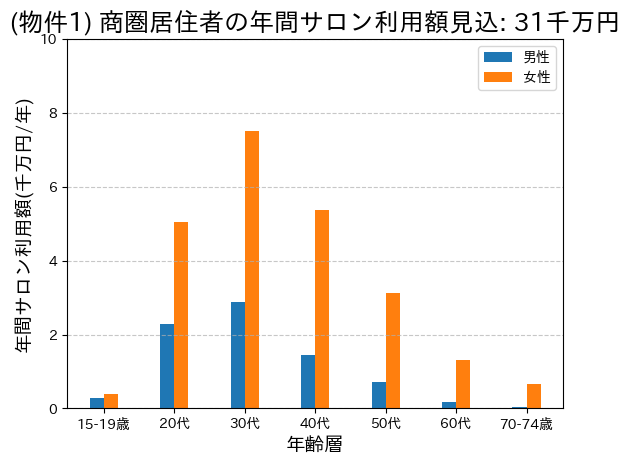

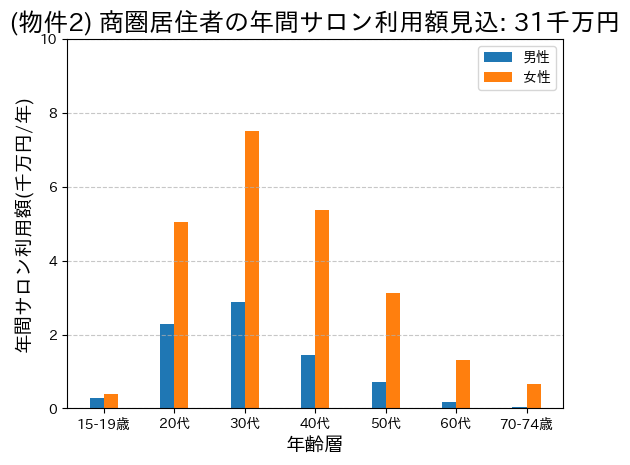

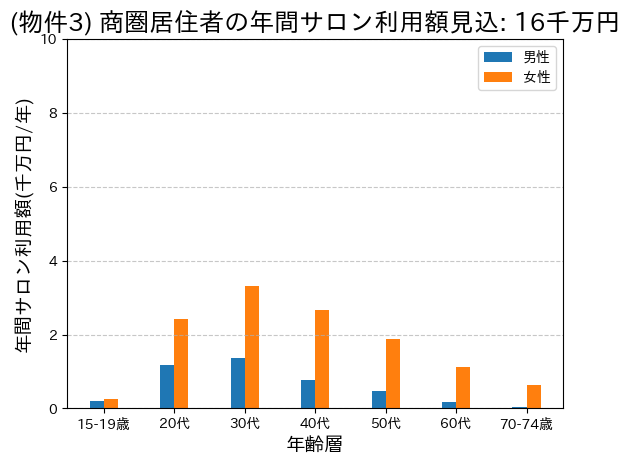

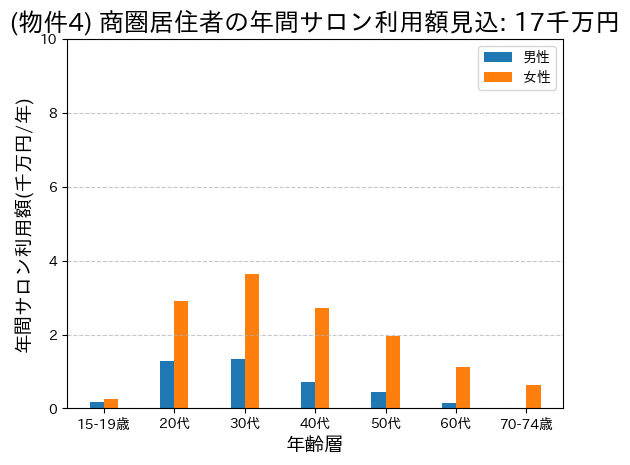

In [5]:
# ライブラリインポート
import streamlit as st
import sqlite3
import requests
import pandas as pd
from time import sleep
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt #グラフ描画ライブラリ
import japanize_matplotlib # matplotlib日本語化対応ライブラリ
import seaborn as sns
from PIL import Image
from geopy.distance import geodesic
import re
import urllib.request
import folium #地図機能

# DB読み込み
# SQLite接続
conn = sqlite3.connect('STEP3チーム課題_TA_IndéMode_DB.db') 
# SQLクエリを実行してデータフレームに読み込む
query1 = 'SELECT * FROM "都内利用者数上位駅";'  
query2 = 'SELECT * FROM "東京23区賃料(募集金額)相場目安ランキングfrom飲食店ドットコム";'  
query3 = 'SELECT * FROM "東京23区スクレイピングコード一覧";'  
query4 = 'SELECT * FROM "東京23区路線一覧_JRメトロ";' 
query5 = 'SELECT * FROM "東京23区駅一覧_JR東京メトロ";' 
query10 = 'SELECT * FROM "サロン利用実態";'   
df1 = pd.read_sql_query(query1, conn)
df2 = pd.read_sql_query(query2, conn)
df3 = pd.read_sql_query(query3, conn)
df4 = pd.read_sql_query(query4, conn)
df5 = pd.read_sql_query(query5, conn)
df10 = pd.read_sql_query(query10, conn)
conn.close()  # データベース接続を閉じる

# リスト作成
line_list = df4['路線名']
station_list = df5['駅名']

# アプリタイトル
print('IndéMode')
print('サロン開業を検討したい方に向けた物件検索・マーケティング分析アプリです。')
print('')

# 入力 
print('下のグラフは 美容室の1日の平均来客数です。')
image_path4 = "image\美容室の平均客数.png" 
image4 = Image.open(image_path4)
display(image4)
print('')
print('下のグラフは 席数vs店舗面積 の開業実績です。')
image_path2 = "image\サロン開業実績_席数と店舗面積.png" 
image2 = Image.open(image_path2)
display(image2)
print('')
print('下の写真は内装費用の坪単価10万円、30万円のサロンイメージです。')
image_path1 = "image\内装イメージ.jpg" 
image1 = Image.open(image_path1)
display(image1)
print('')
print('Q1. ご開業されるサロンのカット席数を選択して下さい。')
print('  2席')
seat_count = 2
print('')
print('Q2. ご開業されるサロンの内装費用を選択して下さい。')
print('  10万/坪')
interior_cost = 10
print('')
print('Q3. ご開業されるサロンで雇用するスタイリストの人数を選択して下さい。')
print('  1人')
stylist_count = 1
print('')
print('Q4. ご開業されるサロンのカット席回転数 ( = 営業時間(h/日) / お客様1人あたりの施術時間(h/人) ) を選択して下さい。')
print('  6回転/日')
turnover = 6
print('')
print('Q5. ご開業されるサロン想定稼働率を選択して下さい。')
print('  60%')
operationg_ratio = 0.6
print('')
print('下のグラフは スタイリストの年齢別給与です。')
image_path3 = "image\スタイリストの年齢別年収.png" 
image3 = Image.open(image_path3)
display(image3)
print('')
print('Q6. 雇用されるスタイリストの給与(万円/月)を選択して下さい。※雇用しない場合は「0」を選択して下さい。')
print('  25万円/月')
stylist_salary = 25
print('')
print('下のグラフは女性客がサロンで使った金額です。')
image_path5 = "image\女性がサロンで使った金額.png" 
image5 = Image.open(image_path5)
display(image5)
print('下のグラフは男性客がサロンで使った金額です。')
image_path6 = "image\男性がサロンで使った金額.png" 
image6 = Image.open(image_path6)
display(image6)
print('Q7. ご開業されるサロンのお客様の客単価見込み(円)を選択して下さい。')
print('  8000円')
cut_price = 0.8
print('')
print('下のグラフは 首都圏駅の利用者数ランキングです。')
image_path7 = "image\首都圏駅_利用者数ランキング.png" 
image7 = Image.open(image_path7)
display(image7)
print('Q8. どの駅の近くで開業されるか選択して下さい。')
print('  有楽町駅')
#station = st.selectbox("駅を選択して下さい。", station_list)
station = '有楽町'
print('')
print('Q9. 最寄駅の路線を選択して下さい。')
print('  JR山手線')
#line = st.selectbox("路線名を選択して下さい。", line_list)
line = "JR山手線"
print('')
print('')
print('ご入力ありがとうございました。')
print('まずは「 ' + line + station + '駅 」の周辺情報を調査します。')
print('')

# heartrails.express APIで緯度経度、郵便番号を取得
url = "https://express.heartrails.com/api/json?method=getStations&line=" + line + "&name=" + station
response = requests.get(url)
res = response.json()
station_data = res.get('response', {}).get('station', [])

# エリア調査関数
def get_area_info(line, station):
    if station_data:
        # 最初の駅情報を取得
        first_station = station_data[0]
        station_longitude = first_station.get('x')
        station_latitude = first_station.get('y')
        station_postal = first_station.get('postal')
        # 郵便番号検索 APIで緯度経度を元に住所を取得
        postal_url = "https://zipcloud.ibsnet.co.jp/api/search?zipcode=" + station_postal
        postal_response = requests.get(postal_url)
        postal_res = postal_response.json()
        station_area = postal_res['results'][0].get('address2')   
        # 駅所在エリアの賃料相場を取得
        #display(df2.head(10))
        area_average_rent = str(df2[df2["区名"] == station_area][["平均額(円/坪)"]].values[0][0])
        # 駅所在エリアのサロン情報を取得
        # display(df3.head(10))
        area_code_rakuten =str(df3[df3["区名"] == station_area].values[0][1])
        # 情報格納のための空配列を用意
        s_name = []
        s_access = []
        s_price = []
        # HTML取得
        URL = 'https://beauty.rakuten.co.jp/addr' + area_code_rakuten + '/page{}/'
        # 複数ページ取得のためのループ処理
        for i in range(1,4):
            # 変数trget_urlに、アクセス先のURLを格納する
            saron_url = URL.format(i)
            # サーバー負荷低減のための1s待機
            sleep(1)
            # リクエスト
            saron_res = requests.get(saron_url)
            # 文字コード変換 (→ utf-8 )
            saron_res.encoding = 'utf-8'
            # BeautifulSoup(解析したいデータ,解析する方法)を指定し、soupに代入
            soup = BeautifulSoup(saron_res.text, "html.parser")
            # sectionデータ(1物件分データ)の取得
            property_section = soup.select('div.m-shopCard__headerContent')
            # property_sectionからsectionを1つずつ取り出してpsに代入
            for ps in property_section:
                ps1 = ps.select('h3.m-shopCard__shopName')[0].text
                ps2 = ps.select('li.m-shopCard__headerOutlineItem')[0].text.replace("アクセス：","")
                ps3 = ps.select('li.m-shopCard__headerOutlineItem')[1].text.replace("カット単価：","").replace("～","").replace("￥","")
                # それぞれ抽出したデータを配列に追加
                s_name.append(ps1)
                s_access.append(ps2)
                s_price.append(ps3)
            # 物件数確認
            #print('サロン件数', len(s_name))
        # データ定義
        data_list = {
            "サロン名" : s_name,
            "アクセス" : s_access,
            "カット単価(円~)" : s_price,
        }
        # データフレーム作成
        df6 = pd.DataFrame(data_list)
        # 重複データ処理
        df6.drop_duplicates(inplace=True)
        df6.reset_index(drop=True,inplace=True)
        # SQLでDBにデータ保存
        # SQLiteデータベースへの接続
        db_path = "STEP3チーム課題_TA_IndéMode_DB.db"
        conn = sqlite3.connect(db_path) 
        # データフレームをSQLiteデータベースに書き込む
        table_name = '近隣サロン一覧_楽天beauty'  # テーブル名を適切なものに変更してください
        df6.to_sql(table_name, conn, if_exists='replace', index=False)
        df6['カット単価(円~)'] = df6['カット単価(円~)'].str.replace(',', '').replace('-', '0').astype(float) #データ数値化
        df6 = df6.sort_values(by='カット単価(円~)') #データ整列
        return {
            '緯度': station_latitude,
            '経度': station_longitude,
            '郵便番号': station_postal,
            #'利用者数ランク': df1[df1["駅名"] == station][["ランキング"]].values[0],
            #'利用者数': df1[df1["駅名"] == station][["利用者数(人/日)"]].values[0],
            'エリア': station_area,
            'エリア賃料相場': area_average_rent,
            'エリア内サロン件数 from 楽天Beauty': len(df6),
            'エリア内カット単価': df6['カット単価(円~)'],   
            'エリア内カット単価平均額': df6['カット単価(円~)'].mean(),   
        }    
    else:
        print("該当する駅情報が見つかりませんでした。")
        return None       

# 物件検索関数
def get_tenanto_info(line, station):
    if station_data:
        # 最初の駅情報を取得
        first_station = station_data[0]
        station_longitude = first_station.get('x')
        station_latitude = first_station.get('y')
        station_postal = first_station.get('postal')
        # 郵便番号検索 APIで緯度経度を元に住所を取得
        postal_url = "https://zipcloud.ibsnet.co.jp/api/search?zipcode=" + station_postal
        postal_response = requests.get(postal_url)
        postal_res = postal_response.json()
        station_area = postal_res['results'][0].get('address2')   
        station_coordinate = (station_latitude, station_longitude)
        # テナントショップから空店舗検索
        # 情報格納のための空配列を用意
        TenantName = [] #name
        TenantPrice = [] # 家賃
        TenantPrice_per_unit_area = [] # 坪単価
        TenantStation = [] # 駅
        #TenantLine = [] # 路線
        #TenantWalk = [] # 駅徒歩
        Tenantlocate = [] # 住所
        Tenantbuild = [] # 築年数
        TenantFloor = [] # 階数
        TenantSize = [] # 平米
        Tenantlongitude = [] # 経度
        Tenantlatitude = [] # 緯度
        Tenantdistance = [] # 指定駅からの距離
        Tenantrisk = [] # 開業リスク
        Tenantinitialinvestiment = [] # 初期投資
        # HTML取得
        area_code_tenant =str(df3[df3["区名"] == station_area].values[0][2])
        URL = 'https://www.tenant-shop.com/index.php?ac=2&c=12&a[]=' + area_code_tenant + '&pa=14&f6=1&sp=3&mv=2&p={}'
        # 緯度経度取得用APIアドレス
        url_1='http://zipcoda.net/api?address='
        url_2 = 'http://geoapi.heartrails.com/api/json?method=searchByPostal&postal='
        # 複数ページ取得のためのループ処理
        for i in range(1,6):
            # 変数trget_urlに、アクセス先のURLを格納する
            load_url = URL.format(i)
            #サーバー負荷低減のための1s待機
            sleep(1)
            # リクエスト
            html = requests.get(load_url)
            # 文字コード変換 (→ utf-8 )
            html.encoding = 'utf-8'
            # BeautifulSoup(解析したいデータ,解析する方法)を指定し、soupに代入
            soup = BeautifulSoup(html.content, "html.parser")
            # sectionデータ(1物件分データ)の取得
            elemsO = soup.find_all("tr",class_="odd result-row")
            elemsE = soup.find_all("tr",class_="even result-row")
            elems = elemsO + elemsE
            # elemsからsectionを1つずつ取り出してelemに代入
            for elem in elems:
                if (elem.select_one('.pubestno') != None):
                    elem1 = elem.select_one(".pubestno").text #テナント名
                else:
                    elem1 = "-1"
                if (elem.select_one('.price') != None):
                    elem2 = elem.select_one('.price').text.replace("万","").replace("(税込)","").replace("(税別)","").replace(" ","").replace("\n","")# 値段をhs2に代入
                else:
                    elem2 = -1 # 値段が記入されていない場合があるので、わかりやすく-1にしておきましょう。
                elem3 = elem.select_one('.info')
                elem40 = elem3.select("div")[1].text
                #elem40 = re.split('[ |　|\xa0]', elem40)
                #elem41 = elem40[0]
                #elem42 = elem40[1]
                #if (elem40[2] != None):
                #    elem43 =elem40[2]
                #else:
                #      elem43 = -1
                elem5 = elem3.select("div")[2].text
                elem6 = elem.select_one(".floor").text.replace("㎡","")
                elem7 = elem.select(".add")[-1].text
                elem8 = elem3.select("div")[0].text.replace(" ","")
                if (elem.select_one('.smallText') != None):
                    elem9 = elem.select_one('.smallText').text.replace("万/坪","").replace("(","").replace(")","")
                else:
                    elem9 = -1 # 値段が記入されていない場合があるので、わかりやすく-1にしておきましょう。
                if station_area in elem8:
                    elem8 = elem8
                else:
                    elem8 = station_area + elem8                
                # ハイフンでテキストを分割
                split_text = elem8.split("-")
                if len(split_text) > 1:
                    address = '東京都' + split_text[0]
                else:
                    address = '東京都' + elem8
                r = requests.get(url_1 + address)
                postal=str(r.json()['items'][0]['zipcode'])
                res_dict = requests.get(url_2+postal).json()['response']['location'][0]
                elem10 = res_dict['x']
                elem11 = res_dict['y']
                tenant_coordinate = (elem11, elem10)
                elem12 = geodesic(station_coordinate, tenant_coordinate).m
                # 損益分岐点
                breakpoint = (30 + int(stylist_count)*int(stylist_salary) + float(elem2) + 30)/(1-0.25)
                # 想定売上
                estimated_sale = float(cut_price) * int(seat_count) * float(turnover) * float(operationg_ratio) * 25
                # 開業リスク
                elem13 = breakpoint/estimated_sale
                elem14 = int(interior_cost) * float(elem6)/3.30578
                # それぞれ抽出したデータを配列に追加
                TenantPrice.append(elem2) 
                TenantPrice_per_unit_area.append(elem9) 
                TenantStation.append(elem40)
                Tenantbuild.append(elem5)
                TenantSize.append(float(elem6)/3.30578)
                TenantFloor.append(elem7)
                Tenantlocate.append(elem8)  
                Tenantlongitude.append(elem10)
                Tenantlatitude.append(elem11)
                Tenantdistance.append(elem12) 
                Tenantrisk.append(elem13)
                Tenantinitialinvestiment.append(elem14)          
        # データ定義
        data_list = {
            "開業リスク" : Tenantrisk,
            "内装費(万円)" : Tenantinitialinvestiment,
            "住所" : Tenantlocate,
            station + "駅からの距離(m)" : Tenantdistance,
            "最寄駅" : TenantStation,
            "賃料(万円)" : TenantPrice,
            "坪単価(万円/坪)" : TenantPrice_per_unit_area,
            "面積(坪)" : TenantSize,    
            "築年" : Tenantbuild,
            "階" : TenantFloor,
            "経度" : Tenantlongitude,
            "緯度" : Tenantlatitude,
        }
        # データフレーム作成
        df8 = pd.DataFrame(data_list)
        # 重複データ処理
        df8.drop_duplicates(inplace=True)
        df8.reset_index(drop=True,inplace=True)
        df8 = df8.round(2)
        df8 = df8.sort_values(by='開業リスク')
        # SQLでDBにデータ保存
        # SQLiteデータベースへの接続
        db_path = "STEP3チーム課題_TA_IndéMode_DB.db"
        conn = sqlite3.connect(db_path) 
        # データフレームをSQLiteデータベースに書き込む
        table_name = '店舗一覧'  # テーブル名を適切なものに変更してください
        df8.to_sql(table_name, conn, if_exists='replace', index=False)
        return {
            '開業リスク': Tenantrisk,
            '内装費≒初期投資(万円)' : Tenantinitialinvestiment,
            'エリア': station_area,
            '住所': Tenantlocate,
            '指定駅からの距離(m)': Tenantdistance,
            '最寄駅': TenantStation,
            '賃料(万円)': TenantPrice,
            '坪単価(万円/坪)': TenantPrice_per_unit_area,
            '面積(坪)': TenantSize,
            '築年': Tenantbuild,
            '階': TenantFloor,
            '空テナント数': len(df8),
            '経度' : Tenantlongitude,
            '緯度' : Tenantlatitude,
        }
    else:
        return None      

if response.status_code == 200:
    area_info = get_area_info(line, station)
    if area_info is not None:
        # リクエストが成功した場合の処理
        print('■ ' + station + '駅 の情報')
        #print(' ・首都圏利用者数ランキング:', area_info['利用者数ランク'][0], '位')
        #print(' ・利用者数:',area_info['利用者数'][0], '人/日')
        print('')
        print('■ ' + station + '駅所在エリア')
        print(' ・エリア:', area_info['エリア'])
        print(' ・エリア賃料相場:', area_info['エリア賃料相場'], '円/坪')
        print(' ・エリア内サロン件数 from 楽天Beauty:', area_info['エリア内サロン件数 from 楽天Beauty'], '件')
        print(' ・エリア内カット単価平均額:',  round(area_info['エリア内カット単価平均額'],0), '円')
        sns.histplot(area_info['エリア内カット単価'], bins=20, kde=True, color='skyblue')  # kde=Trueでカーネル密度推定も表示
        plt.xlabel('値')
        plt.xlabel('カット単価(円)')
        plt.ylabel('出店件数')
        plt.title(area_info['エリア'] + 'サロンのカット単価ヒストグラム')
        plt.show()

    tenanto_info = get_tenanto_info(line, station)
    if tenanto_info is not None:
        # リクエストが成功した場合の処理
        print(' ・空きテナント検索数:', tenanto_info['空テナント数'], '件')
        # SQLite接続
        conn = sqlite3.connect('STEP3チーム課題_TA_IndéMode_DB.db') 
        # SQLクエリを実行してデータフレームに読み込む
        query8 = 'SELECT * FROM "店舗一覧";'  
        df8 = pd.read_sql_query(query8, conn)
        conn.close()  # データベース接続を閉じる
        df8.drop('緯度', axis=1, inplace=True)
        df8.drop('経度', axis=1, inplace=True)
        print(' ・開業リスクの低いテナント上位5件  ※開業リスク = (目標利益 - 固定費)/(1-変動費率) ÷ 想定売上')
        print('     ※リスク1.0以上の物件は目標利益を見込めない(場合によっては赤字となる)物件です。おススメできませんので開業条件を見直す等ご検討下さい。')
        print('     ※無料版では目標利益 = 30万円/月、変動費 = 25% で計算しております。詳細に数値設定されたい場合は有料版のご利用をお願い致します。')
        display(df8.head())
        # おススメ物件を地図に表示
        print(' ・開業リスクの低いテナント上位5件の所在地')
        print('     ※MAP上の丸枠は各テナントの商圏範囲を示しています。')
        print('     ※無料版では商圏範囲を半径500mと設定しております。詳細に数値設定されたい場合は有料版のご利用をお願い致します。')
        conn = sqlite3.connect('STEP3チーム課題_TA_IndéMode_DB.db') 
        query8 = 'SELECT * FROM "店舗一覧";'  
        df8 = pd.read_sql_query(query8, conn)
        conn.close()  # データベース接続を閉じる
        df8 = df8.head(5)
        first_station = station_data[0]
        station_longitude = first_station.get('x')
        station_latitude = first_station.get('y')
        map = folium.Map(location=[station_latitude, station_longitude], zoom_start=13)  # 中心座標を設定して地図を作成
        # データフレーム内の各行の緯度と経度をマーカーとして地図上に表示
        for index, row in df8.iterrows():
            folium.Marker([row['緯度'], row['経度']], popup=row['開業リスク']).add_to(map)
            #500mの円を描画
            folium.Circle(
                location=[row['緯度'], row['経度']],
                radius= 500,  # 半径をメートルで指定
                color='#ff0000',  # 円の色
                fill=True,  # 円を塗りつぶす
                fill_color='#0000ff',  # 塗りつぶしの色
                fill_opacity=0.1,  # 塗りつぶしの透明度
                popup='500m圏'  # 円に表示する説明
            ).add_to(map)
        # 地図を表示
        display(map)
        
        print('■ 開業リスク低いテナント上位5件の商圏分析')
        print('   ここからはシミュレーションに含まれない情報です。入力条件の検討にご活用下さい。')
        print('')
        # jSTAT MAP認証設定
        REQUEST_URL = 'https://jstatmap.e-stat.go.jp/statmap/api/1.00?category=richReport&func=getSummary'
        USER_ID = '&userid=noriyasukawana@outlook.jp'  #個人の登録ID
        API_KEY = '&key=dMUbbbyc9ThTzG4PNpA2'  #個人のAPIキー
        # params入力設定
        rangeType = '&rangeType=circle'  # circle(円) or driveTime(到達圏)
        travelMode = '&travelMode=walking'  # car(車) or walking(徒歩)
        speed = '&speed=3.2'  # 時速(km/h)
        time = '&time=15,30,45'  # 移動時間(min)
        output = '&output=json'  # 出力形式
        radius = '&radius=500'
        # 空のdfを用意
        df9 = pd.DataFrame()
        for i in range(5):
            latitude = '&lat=' + str(df8['緯度'][i])  # 緯度
            longitude = '&lng=' + str(df8['経度'][i])  # 経度
            res = requests.get(REQUEST_URL + USER_ID + latitude + longitude + rangeType + radius + API_KEY + output)
            result = res.json() 
            #性別別人口
            Gender_pop = result['GET_SUMMARY']['DATASET_INF'][0]['TABLE_INF'][0]['DATA_INF']['VALUE']
            Gender_pop2 = [{key: value for key, value in entry.items() if key not in ['@cat11', '@cat12']} for entry in Gender_pop]
            Gender_pop3 = [entry['$'] for entry in Gender_pop2]
            # リストを3つずつに分割
            list_Gender = [Gender_pop3[i:i+3] for i in range(0, len(Gender_pop3), 3)]
            # DataFrameに変換
            df_Gender = pd.DataFrame(list_Gender, columns=['総人口', '男性人口', '女性人口'])
            #年齢別人口
            Age_pop = result['GET_SUMMARY']['DATASET_INF'][0]['TABLE_INF'][1]['DATA_INF']['VALUE']
            Age_pop2 = [{key: value for key, value in entry.items() if key not in ['@cat11', '@cat13']} for entry in Age_pop]
            Age_pop3 = [entry['$'] for entry in Age_pop2]
            # リストを3つずつに分割
            list_Age = [Age_pop3[i:i+16] for i in range(0, len(Age_pop3), 16)]
            # DataFrameに変換
            df_Age = pd.DataFrame(list_Age, columns=['4 歳以下', '5～9 歳', '10～14 歳', '15～19 歳', '20～24 歳', '25～29 歳', '30～34 歳','35～39 歳', '40～44 歳','45～49 歳', '50～54 歳','55～59 歳', '60～64 歳','65～69 歳', '70～74 歳','75 歳以上'])
            #display(df_Age)
            # DataFrameを結合
            df = pd.concat([df_Gender, df_Age], axis=1)
            # 項目作成
            class_name = result['GET_SUMMARY']['DATASET_INF'][0]['TABLE_INF'][0]['CLASS_INF']['CLASS_OBJ'][0]['CLASS']
            class_name2 = [{key: value for key, value in entry.items() if key not in ['@code']} for entry in class_name]
            class_name3 = [entry['@name'] for entry in class_name2]
            # 項目カラムを用意
            item_column = [str(df8['開業リスク'][i]), class_name3[1], class_name3[2]]
            # 項目カラムをDataFrameの先頭列に追加
            df.insert(0, '開業リスク', item_column)
            df = df.iloc[0]
            # df を df9 に列として追加
            df9 = pd.concat([df9, df], axis=1)
        df9 = df9.T
        df9 = df9.reset_index(drop=True)
        # SQLiteデータベースへの接続
        db_path = "STEP3チーム課題_TA_IndéMode_DB.db"
        conn = sqlite3.connect(db_path) 
        # データフレームをSQLiteデータベースに書き込む
        table_name = '空テナント500m圏内人口構成'  # テーブル名を適切なものに変更してください
        df9.to_sql(table_name, conn, if_exists='replace', index=False)
        # SQLiteデータベース接続

        # df9加工
        df9['20代'] = df9['20～24 歳'].astype(int) + df9['25～29 歳'].astype(int)
        df9['30代'] = df9['30～34 歳'].astype(int) + df9['35～39 歳'].astype(int)
        df9['40代'] = df9['40～44 歳'].astype(int) + df9['45～49 歳'].astype(int)
        df9['50代'] = df9['50～54 歳'].astype(int) + df9['55～59 歳'].astype(int)
        df9['60代'] = df9['60～64 歳'].astype(int) + df9['65～69 歳'].astype(int)
        del df9['4 歳以下']  #列を削除
        del df9['5～9 歳']  
        del df9['10～14 歳'] 
        del df9['20～24 歳'] 
        del df9['25～29 歳'] 
        del df9['30～34 歳'] 
        del df9['35～39 歳'] 
        del df9['40～44 歳'] 
        del df9['45～49 歳'] 
        del df9['50～54 歳'] 
        del df9['55～59 歳']
        del df9['60～64 歳'] 
        del df9['65～69 歳']  
        del df9['75 歳以上']  
        df9['男性比率'] = df9['男性人口'].astype(float) / df9['総人口'].astype(float)
        df9['女性比率'] = df9['女性人口'].astype(float) / df9['総人口'].astype(float)
        del df9['総人口']  
        del df9['男性人口']  
        del df9['女性人口'] 
        df9['15-19歳男性'] =   df9['15～19 歳'].astype(float) * df9['男性比率'].astype(float)
        df9['20代男性'] =   df9['20代'].astype(float) * df9['男性比率'].astype(float)
        df9['30代男性'] =   df9['30代'].astype(float) * df9['男性比率'].astype(float)
        df9['40代男性'] =   df9['40代'].astype(float) * df9['男性比率'].astype(float)
        df9['50代男性'] =   df9['50代'].astype(float) * df9['男性比率'].astype(float)
        df9['60代男性'] =   df9['60代'].astype(float) * df9['男性比率'].astype(float)
        df9['70-74歳男性'] =   df9['70～74 歳'].astype(float) * df9['男性比率'].astype(float)
        df9['15-19歳女性'] =   df9['15～19 歳'].astype(float) * df9['女性比率'].astype(float)
        df9['20代女性'] =   df9['20代'].astype(float) * df9['女性比率'].astype(float)
        df9['30代女性'] =   df9['30代'].astype(float) * df9['女性比率'].astype(float)
        df9['40代女性'] =   df9['40代'].astype(float) * df9['女性比率'].astype(float)
        df9['50代女性'] =   df9['50代'].astype(float) * df9['女性比率'].astype(float)
        df9['60代女性'] =   df9['60代'].astype(float) * df9['女性比率'].astype(float)
        df9['70-74歳女性'] =   df9['70～74 歳'].astype(float) * df9['女性比率'].astype(float)
        del df9['15～19 歳'] 
        del df9['20代'] 
        del df9['30代'] 
        del df9['40代'] 
        del df9['50代'] 
        del df9['60代'] 
        del df9['70～74 歳'] 
        del df9['男性比率'] 
        del df9['女性比率'] 
        # 項目を抜き取る
        df9_item = df9.index
        df10_item = df10['項目']
        del df9['開業リスク']
        del df10['項目']
        # 行同士を掛け合わせる
        result0 = df9.iloc[0] * df10.iloc[2] / 10000000
        result1 = df9.iloc[1] * df10.iloc[2] / 10000000
        result2 = df9.iloc[2] * df10.iloc[2] / 10000000
        result3 = df9.iloc[3] * df10.iloc[2] / 10000000
        result4 = df9.iloc[4] * df10.iloc[2] / 10000000
        # 列方向に結合
        result = pd.concat([pd.DataFrame(result0), pd.DataFrame(result1), pd.DataFrame(result2), pd.DataFrame(result3), pd.DataFrame(result4)], axis=1)
        # 行と列を反転
        result = result.T
        # インデックスリセット
        result = result.set_index(df9_item)
        # 年間総額追加
        result['総額'] = result.sum(axis=1)
        # 指定した列をデータフレームの先頭に移動
        target_column = '総額'
        if target_column in result:
            columns = ['総額'] + [col for col in result if col != '総額']
            result = result[columns]
        print('・テナント商圏居住者の年間サロン利用額(千万円)')
        #display(result)
        # SQLでDBにデータ保存
        # SQLiteデータベースへの接続
        db_path = "STEP3チーム課題_TA_IndéMode_DB.db"
        conn = sqlite3.connect(db_path) 
        # データフレームをSQLiteデータベースに書き込む
        table_name = '商圏サロン利用金額'  # テーブル名を適切なものに変更してください
        result.to_sql(table_name, conn, if_exists='replace', index=False)
        result_male = result[['15-19歳男性', '20代男性', '30代男性', '40代男性', '50代男性', '60代男性','70-74歳男性']]
        result_female = result[['15-19歳女性', '20代女性', '30代女性', '40代女性', '50代女性', '60代女性','70-74歳女性']]
        #棒グラフのX値を指定
        x_male = [0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9]
        x_female = [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1]
        x_label = [1, 2, 3, 4, 5, 6, 7]
        #500m圏内
        for i in range(5):
            plt.figure
            plt.title('(物件' + str(df9_item[i]) + ") 商圏居住者の年間サロン利用額見込: " + str(int(round(result.loc[df9_item[i],'総額']))) + '千万円', fontsize = 18 )
            plt.xlabel('年齢層', fontsize = 14 )
            plt.ylabel('年間サロン利用額(千万円/年)', fontsize = 14 )
            plt.bar(x_male, result_male.iloc[i] , width = 0.2, label = '男性')
            plt.bar(x_female, result_female.iloc[i] , width = 0.2, label = '女性') 
            plt.grid(axis='y') #y軸グリッド追加
            plt.xticks(x_label, ['15-19歳','20代','30代','40代','50代','60代','70-74歳']) #x軸のx_label位置にラベル記入
            plt.legend()
            plt.ylim(0, 10)  # 0から10までの範囲に調整
            plt.grid(axis='y', linestyle='--', alpha=0.7) # y軸の補助目盛線を追加
            plt.show() 
else:
    # リクエストがエラーの場合の処理
    print("路線名、駅名を再確認して下さい。")

In [18]:
station = '亀戸'
print('')
print('Q9. 最寄駅の路線を選択して下さい。')
print('  JR総武線')
#line = st.selectbox("路線名を選択して下さい。", line_list)
line = "JR総武線"
print('')
print('')
print('ご入力ありがとうございました。')
print('まずは「 ' + line + station + '駅 」の周辺情報を調査します。')
print('')

# heartrails.express APIで緯度経度、郵便番号を取得
url = "https://express.heartrails.com/api/json?method=getStations&line=" + line + "&name=" + station
response = requests.get(url)
res = response.json()
station_data = res.get('response', {}).get('station', [])

# 最初の駅情報を取得
first_station = station_data[0]
station_longitude = first_station.get('x')
station_latitude = first_station.get('y')
station_postal = first_station.get('postal')
# 郵便番号検索 APIで緯度経度を元に住所を取得
postal_url = "https://zipcloud.ibsnet.co.jp/api/search?zipcode=" + station_postal
postal_response = requests.get(postal_url)
postal_res = postal_response.json()
station_area = postal_res['results'][0].get('address2')   
station_coordinate = (station_latitude, station_longitude)
# テナントショップから空店舗検索
# 情報格納のための空配列を用意
TenantName = [] #name
TenantPrice = [] # 家賃
TenantPrice_per_unit_area = [] # 坪単価
TenantStation = [] # 駅
#TenantLine = [] # 路線
#TenantWalk = [] # 駅徒歩
Tenantlocate = [] # 住所
Tenantbuild = [] # 築年数
TenantFloor = [] # 階数
TenantSize = [] # 平米
Tenantlongitude = [] # 経度
Tenantlatitude = [] # 緯度
Tenantdistance = [] # 指定駅からの距離
Tenantrisk = [] # 開業リスク
Tenantinitialinvestiment = [] # 初期投資
# HTML取得
area_code_tenant =str(df3[df3["区名"] == station_area].values[0][2])
print(station_area)
URL = 'https://www.tenant-shop.com/index.php?ac=2&c=12&a[]=' + area_code_tenant + '&pa=14&f6=1&sp=3&mv=2&p={}'
# 緯度経度取得用APIアドレス
url_1='http://zipcoda.net/api?address='
url_2 = 'http://geoapi.heartrails.com/api/json?method=searchByPostal&postal='
# 複数ページ取得のためのループ処理
for i in range(1,6):
    # 変数trget_urlに、アクセス先のURLを格納する
    load_url = URL.format(i)
    #サーバー負荷低減のための1s待機
    sleep(1)
    # リクエスト
    html = requests.get(load_url)
    # 文字コード変換 (→ utf-8 )
    html.encoding = 'utf-8'
    # BeautifulSoup(解析したいデータ,解析する方法)を指定し、soupに代入
    soup = BeautifulSoup(html.content, "html.parser")
    # sectionデータ(1物件分データ)の取得
    elemsO = soup.find_all("tr",class_="odd result-row")
    elemsE = soup.find_all("tr",class_="even result-row")
    elems = elemsO + elemsE
    # elemsからsectionを1つずつ取り出してelemに代入
    for elem in elems:
        if (elem.select_one('.pubestno') != None):
            elem1 = elem.select_one(".pubestno").text #テナント名
        else:
            elem1 = "-1"
        if (elem.select_one('.price') != None):
            elem2 = elem.select_one('.price').text.replace("万","").replace("(税込)","").replace("(税別)","").replace(" ","").replace("\n","")# 値段をhs2に代入
        else:
            elem2 = -1 # 値段が記入されていない場合があるので、わかりやすく-1にしておきましょう。
        elem3 = elem.select_one('.info')
        print(elem3)
        elem40 = elem3.select("div")[1].text
                #elem40 = re.split('[ |　|\xa0]', elem40)
                #elem41 = elem40[0]
                #elem42 = elem40[1]
                #if (elem40[2] != None):
                #    elem43 =elem40[2]
                #else:
                #      elem43 = -1
        if len(elem3.select("div")) >= 3:
            elem5 = elem3.select("div")[2].text
        else:
            elem5 = elem3.select("div")[1].text   
        elem6 = elem.select_one(".floor").text.replace("㎡","")
        elem7 = elem.select(".add")[-1].text
        elem8 = elem3.select("div")[0].text.replace(" ","")
        if (elem.select_one('.smallText') != None):
            elem9 = elem.select_one('.smallText').text.replace("万/坪","").replace("(","").replace(")","")
        else:
            elem9 = -1 # 値段が記入されていない場合があるので、わかりやすく-1にしておきましょう。
        if station_area in elem8:
            elem8 = elem8
        else:
            elem8 = station_area + elem8
        
        # ハイフンでテキストを分割
        split_text = elem8.split("-")
        if len(split_text) > 1:
            address = '東京都' + split_text[0]
        else:
            address = '東京都' + elem8
        print(elem8)
        print(address)
        r = requests.get(url_1 + address)
        print(r.json())
        postal=str(r.json()['items'][0]['zipcode'])
        res_dict = requests.get(url_2+postal).json()['response']['location'][0]
        elem10 = res_dict['x']
        elem11 = res_dict['y']
        tenant_coordinate = (elem11, elem10)
        elem12 = geodesic(station_coordinate, tenant_coordinate).m
        # 損益分岐点
        breakpoint = (30 + int(stylist_count)*int(stylist_salary) + float(elem2) + 30)/(1-0.25)
        # 想定売上
        estimated_sale = float(cut_price) * int(seat_count) * float(turnover) * float(operationg_ratio) * 25
        # 開業リスク
        elem13 = breakpoint/estimated_sale
        elem14 = int(interior_cost) * float(elem6)/3.30578
        # それぞれ抽出したデータを配列に追加
        TenantPrice.append(elem2) 
        TenantPrice_per_unit_area.append(elem9) 
        TenantStation.append(elem40)
        Tenantbuild.append(elem5)
        TenantSize.append(float(elem6)/3.30578)
        TenantFloor.append(elem7)
        Tenantlocate.append(elem8)  
        Tenantlongitude.append(elem10)
        Tenantlatitude.append(elem11)
        Tenantdistance.append(elem12) 
        Tenantrisk.append(elem13)
        Tenantinitialinvestiment.append(elem14)          
# データ定義
data_list = {
    "開業リスク" : Tenantrisk,
    "内装費(万円)" : Tenantinitialinvestiment,
    "住所" : Tenantlocate,
    station + "駅からの距離(m)" : Tenantdistance,
    "最寄駅" : TenantStation,
    "賃料(万円)" : TenantPrice,
    "坪単価(万円/坪)" : TenantPrice_per_unit_area,
    "面積(坪)" : TenantSize,    
    "築年" : Tenantbuild,
    "階" : TenantFloor,
    "経度" : Tenantlongitude,
    "緯度" : Tenantlatitude,
}
# データフレーム作成
df8 = pd.DataFrame(data_list)
# 重複データ処理
df8.drop_duplicates(inplace=True)
df8.reset_index(drop=True,inplace=True)
df8 = df8.round(2)
df8 = df8.sort_values(by='開業リスク')


Q9. 最寄駅の路線を選択して下さい。
  JR総武線


ご入力ありがとうございました。
まずは「 JR総武線亀戸駅 」の周辺情報を調査します。

江東区
<div class="info"><img alt="" border="0" src="/contents/images/result/syozai.png"/><div class="non-decoration">江東区亀戸6</div><img alt="" border="0" src="/contents/images/result/eki-.png"/><div>JR総武・中央緩行線　亀戸<img alt="" border="0" src="/contents/images/result/eki.png"/> <img alt="" border="0" src="/contents/images/result/toho.png"/><span class="boldText">3</span><img alt="" border="0" src="/contents/images/result/fun.png"/></div><img alt="" border="0" src="/contents/images/result/tikunen.png"/><div>1985年11月(昭和60年11月)</div></div>
江東区亀戸6
東京都江東区亀戸6
{'status': 200, 'length': 2, 'items': [{'zipcode': '1360071', 'pref': '東京都', 'components': ['東京都', '江東区', '亀戸'], 'address': '江東区亀戸'}, {'zipcode': '1350000', 'pref': '東京都', 'components': ['東京都', '江東区'], 'address': '江東区'}]}
<div class="info"><img alt="" border="0" src="/contents/images/result/syozai.png"/><div class="non-decoration">江東区東陽3</div><img alt="" border="0" src=

>### 補足データ作成コード

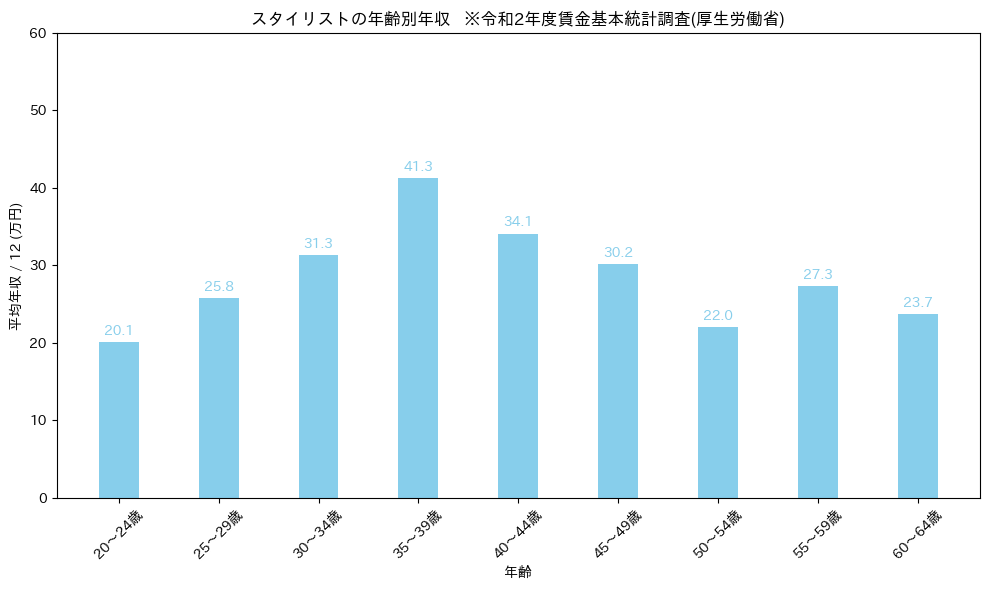

In [3]:
# スタイリストの平均年収

import matplotlib.pyplot as plt

data = {
    '年齢': ['20～24歳','25～29歳','30～34歳','35～39歳','40～44歳','45～49歳','50～54歳','55～59歳','60～64歳'],
    '平均年収(万円)': [241.08,309.21,375.97,495.53,408.85,362.84,263.86,328.19,284.88]
}

df = pd.DataFrame(data)
df['月額換算(万円)'] = round(df['平均年収(万円)']/12,1)

# 棒グラフの太さを調整
bar_width = 0.4  # 太さを設定

plt.figure(figsize=(10, 6))  # グラフのサイズを設定
bars = plt.bar(df['年齢'], df['月額換算(万円)'],  width=bar_width, color='skyblue')  # 棒グラフを描画
plt.xlabel('年齢')  # x軸のラベル
plt.ylabel('平均年収 / 12 (万円)')  # y軸のラベル
plt.title('スタイリストの年齢別年収   ※令和2年度賃金基本統計調査(厚生労働省)')  # グラフのタイトル

# x軸のラベルを斜めに表示
plt.xticks(rotation=45)

# y軸の最大値を60に設定
plt.ylim(0, 60)

# 各バーの上に数値を記載
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),  # テキストとして表示する数値
                 xy=(bar.get_x() + bar.get_width() / 2, height),  # バーの中央に配置
                 xytext=(0, 3),  # テキストの位置調整
                 textcoords="offset points",
                 ha='center',  # 横方向の配置を中央に
                 va='bottom',
                 color = 'skyblue')  # 垂直方向の配置を下に

# グラフを保存
plt.tight_layout()  # レイアウトを調整して文字がはみ出さないようにする
plt.savefig('image/image-3_スタイリストの年齢別年収.png', bbox_inches='tight')  # ファイルパスを指定して保存
# グラフを表示
plt.show()
# 女性の客単価

import matplotlib.pyplot as plt

data = {
    '年齢': ['全年齢','15～19歳','20代','30代','40代','50代','60代','70代'],
    'サロンで使う金額(円/回)': [7943,7639,10015,9704,8589,7864,6623,5797]
}

df = pd.DataFrame(data)

# 棒グラフの太さを調整
bar_width = 0.4  # 太さを設定

plt.figure(figsize=(10, 6))  # グラフのサイズを設定
bars = plt.bar(df['年齢'], df['サロンで使う金額(円/回)'],  width=bar_width, color='skyblue')  # 棒グラフを描画
plt.xlabel('年齢')  # x軸のラベル
plt.ylabel('サロンで使う金額(円/回)')  # y軸のラベル
plt.title('女性がサロンで使った金額   ※サロンユーザー調査2023(全国理美容製造者協会)')  # グラフのタイトル

# x軸のラベルを斜めに表示
plt.xticks(rotation=45)

# y軸の最大値を60に設定
plt.ylim(0, 12000)

# 各バーの上に数値を記載
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),  # テキストとして表示する数値
                 xy=(bar.get_x() + bar.get_width() / 2, height),  # バーの中央に配置
                 xytext=(0, 3),  # テキストの位置調整
                 textcoords="offset points",
                 ha='center',  # 横方向の配置を中央に
                 va='bottom',
                 color = 'skyblue')  # 垂直方向の配置を下に

# グラフを保存
plt.tight_layout()  # レイアウトを調整して文字がはみ出さないようにする
plt.savefig('image/女性がサロンで使った金額.png', bbox_inches='tight')  # ファイルパスを指定して保存
# グラフを表示
plt.show()

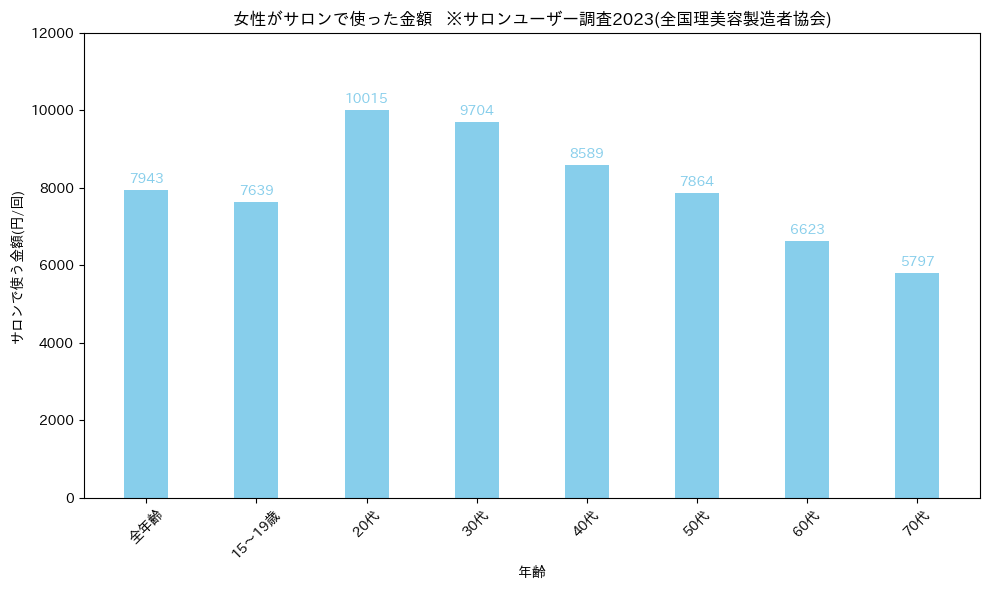

In [7]:
# 女性の客単価

import matplotlib.pyplot as plt

data = {
    '年齢': ['全年齢','15～19歳','20代','30代','40代','50代','60代','70代'],
    'サロンで使う金額(円/回)': [7943,7639,10015,9704,8589,7864,6623,5797]
}

df = pd.DataFrame(data)

# 棒グラフの太さを調整
bar_width = 0.4  # 太さを設定

plt.figure(figsize=(10, 6))  # グラフのサイズを設定
bars = plt.bar(df['年齢'], df['サロンで使う金額(円/回)'],  width=bar_width, color='skyblue')  # 棒グラフを描画
plt.xlabel('年齢')  # x軸のラベル
plt.ylabel('サロンで使う金額(円/回)')  # y軸のラベル
plt.title('女性がサロンで使った金額   ※サロンユーザー調査2023(全国理美容製造者協会)')  # グラフのタイトル

# x軸のラベルを斜めに表示
plt.xticks(rotation=45)

# y軸の最大値を60に設定
plt.ylim(0, 12000)

# 各バーの上に数値を記載
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),  # テキストとして表示する数値
                 xy=(bar.get_x() + bar.get_width() / 2, height),  # バーの中央に配置
                 xytext=(0, 3),  # テキストの位置調整
                 textcoords="offset points",
                 ha='center',  # 横方向の配置を中央に
                 va='bottom',
                 color = 'skyblue')  # 垂直方向の配置を下に

# グラフを保存
plt.tight_layout()  # レイアウトを調整して文字がはみ出さないようにする
plt.savefig('image/女性がサロンで使った金額.png', bbox_inches='tight')  # ファイルパスを指定して保存
# グラフを表示
plt.show()

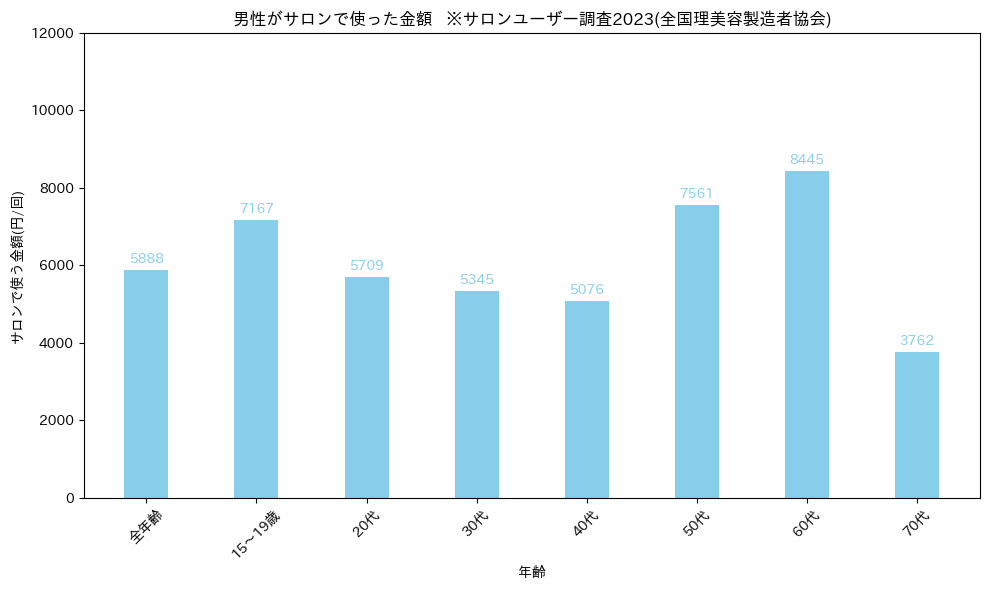

In [8]:
# 男性の客単価

import matplotlib.pyplot as plt

data = {
    '年齢': ['全年齢','15～19歳','20代','30代','40代','50代','60代','70代'],
    'サロンで使う金額(円/回)': [5888,7167,5709,5345,5076,7561,8445,3762]
}

df = pd.DataFrame(data)

# 棒グラフの太さを調整
bar_width = 0.4  # 太さを設定

plt.figure(figsize=(10, 6))  # グラフのサイズを設定
bars = plt.bar(df['年齢'], df['サロンで使う金額(円/回)'],  width=bar_width, color='skyblue')  # 棒グラフを描画
plt.xlabel('年齢')  # x軸のラベル
plt.ylabel('サロンで使う金額(円/回)')  # y軸のラベル
plt.title('男性がサロンで使った金額   ※サロンユーザー調査2023(全国理美容製造者協会)')  # グラフのタイトル

# x軸のラベルを斜めに表示
plt.xticks(rotation=45)

# y軸の最大値を60に設定
plt.ylim(0, 12000)

# 各バーの上に数値を記載
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),  # テキストとして表示する数値
                 xy=(bar.get_x() + bar.get_width() / 2, height),  # バーの中央に配置
                 xytext=(0, 3),  # テキストの位置調整
                 textcoords="offset points",
                 ha='center',  # 横方向の配置を中央に
                 va='bottom',
                 color = 'skyblue')  # 垂直方向の配置を下に

# グラフを保存
plt.tight_layout()  # レイアウトを調整して文字がはみ出さないようにする
plt.savefig('image/男性がサロンで使った金額.png', bbox_inches='tight')  # ファイルパスを指定して保存
# グラフを表示
plt.show()

In [6]:
#駅所在エリアのサロン情報

# DBからデータを読み取り、近隣サロンの価格帯を表示
# SQLiteデータベース接続
conn = sqlite3.connect('STEP3チーム課題_TA_IndéMode_DB.db')
# SQLクエリを実行してデータフレームに読み込む
query5 = 'SELECT * FROM "近隣サロン一覧_楽天beauty";'  
df5 = pd.read_sql_query(query5, conn)
# データベース接続を閉じる
conn.close()

# display(df5)

df5['カット単価(円~)'] = df5['カット単価(円~)'].str.replace(',', '').astype(float) #データ数値化
df5 = df5.sort_values(by='カット単価(円~)') #データ整列

# display(df5)

print('■ ' + station + '駅所在エリア情報')
print(" ・エリア：" + str(station_area))
print(" ・エリア内サロン件数 from 楽天Beauty：" + str(len(df5)) + "件")
print(" ・エリア内サロンカット単価 平均価格：" + str(df5['カット単価(円~)'].mean()) + "円")

sns.histplot(df5['カット単価(円~)'], bins=20, kde=True, color='skyblue')  # kde=Trueでカーネル密度推定も表示
plt.xlabel('値')
plt.xlabel('カット単価(円)')
plt.ylabel('出店件数')
plt.title('千代田区サロンのカット単価ヒストグラム')
plt.show()

■ 有楽町駅所在エリア情報


NameError: name 'station_area' is not defined